# Revisão de Estatística Descritiva - Aplicação no Mercado Financeiro

## Importando as Bibliotecas

In [317]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from scipy import stats
from scipy import optimize

pio.renderers.default = 'notebook_connected'

### Baixando os dados de uma ação para da B3

In [318]:
bb_df = data.DataReader(name='BBAS3.SA',
                           data_source='yahoo', start='2000-01-01')
bb_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,2.853333,2.733333,2.800000,2.733333,514800.0,1.182134
2000-01-04,2.740000,2.603333,2.733333,2.603333,314100.0,1.125910
2000-01-05,2.633333,2.506666,2.600000,2.630000,478800.0,1.137443
2000-01-06,2.666666,2.600000,2.630000,2.666666,205200.0,1.153301
2000-01-07,2.666666,2.606666,2.666666,2.606666,394200.0,1.127352
...,...,...,...,...,...,...
2022-07-27,35.639999,35.130001,35.410000,35.549999,7194300.0,35.549999
2022-07-28,36.320000,35.439999,35.650002,36.209999,8129800.0,36.209999
2022-07-29,36.590000,35.900002,36.169998,35.970001,11852100.0,35.970001


### Construindo uma Base de Dados Financeiros com Mais Ações

In [319]:
acoes = ['BBAS3.SA', 'BRFS3.SA', 'CIEL3.SA', 'PETR3.SA', 'MGLU3.SA', '^BVSP']
acoes

['BBAS3.SA', 'BRFS3.SA', 'CIEL3.SA', 'PETR3.SA', 'MGLU3.SA', '^BVSP']

In [320]:
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = data.DataReader(acao,
                                     data_source='yahoo', start='2015-01-01')['Close']

In [321]:
acoes_df

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
Date,,,,,,
2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812,48512.0
2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187,47517.0
2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062,48001.0
2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875,49463.0
2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000,49943.0
...,...,...,...,...,...,...
2022-07-27,35.549999,16.360001,4.300000,34.009998,2.700000,101438.0
2022-07-28,36.209999,16.350000,4.280000,34.730000,2.720000,102597.0
2022-07-29,35.970001,15.960000,4.430000,36.959999,2.580000,103165.0


In [322]:
acoes_df.reset_index(inplace=True)
acoes_df

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812,48512.0
1,2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187,47517.0
2,2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062,48001.0
3,2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875,49463.0
4,2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000,49943.0
...,...,...,...,...,...,...,...
1880,2022-07-27,35.549999,16.360001,4.300000,34.009998,2.700000,101438.0
1881,2022-07-28,36.209999,16.350000,4.280000,34.730000,2.720000,102597.0
1882,2022-07-29,35.970001,15.960000,4.430000,36.959999,2.580000,103165.0
1883,2022-08-01,35.680000,16.719999,4.350000,36.500000,2.720000,102225.0


### Visualização dos Dados

In [323]:
figuraHistorico = px.line(title = 'Histórico do preço das ações')
for i in acoes_df.columns[1:]:
  figuraHistorico.add_scatter(x = acoes_df["Date"] ,y = acoes_df[i], name = i)
figuraHistorico.show()

Taxa de Retorno de Ações

$$ \mathbb{E} [ R_i] = log \left( \frac{P_t}{P_{t-1}} \right) $$

In [324]:
dataset = acoes_df.copy()
dataset

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812,48512.0
1,2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187,47517.0
2,2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062,48001.0
3,2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875,49463.0
4,2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000,49943.0
...,...,...,...,...,...,...,...
1880,2022-07-27,35.549999,16.360001,4.300000,34.009998,2.700000,101438.0
1881,2022-07-28,36.209999,16.350000,4.280000,34.730000,2.720000,102597.0
1882,2022-07-29,35.970001,15.960000,4.430000,36.959999,2.580000,103165.0
1883,2022-08-01,35.680000,16.719999,4.350000,36.500000,2.720000,102225.0


In [325]:
dataset.drop(labels = ['Date'], axis=1, inplace=True)
dataset

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,22.650000,62.180000,22.986111,9.000000,0.232812,48512.0
1,22.180000,61.000000,22.204861,8.270000,0.237187,47517.0
2,22.490000,61.549999,21.759258,8.060000,0.234062,48001.0
3,23.480000,64.300003,21.961805,8.450000,0.241875,49463.0
4,23.559999,63.150002,22.569445,9.020000,0.240000,49943.0
...,...,...,...,...,...,...
1880,35.549999,16.360001,4.300000,34.009998,2.700000,101438.0
1881,36.209999,16.350000,4.280000,34.730000,2.720000,102597.0
1882,35.970001,15.960000,4.430000,36.959999,2.580000,103165.0
1883,35.680000,16.719999,4.350000,36.500000,2.720000,102225.0


In [326]:
dataset.shift(1)

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,NaN,NaN,NaN,NaN,NaN,NaN
1,22.650000,62.180000,22.986111,9.000000,0.232812,48512.0
2,22.180000,61.000000,22.204861,8.270000,0.237187,47517.0
3,22.490000,61.549999,21.759258,8.060000,0.234062,48001.0
4,23.480000,64.300003,21.961805,8.450000,0.241875,49463.0
...,...,...,...,...,...,...
1880,35.320000,16.290001,4.140000,33.790001,2.610000,99772.0
1881,35.549999,16.360001,4.300000,34.009998,2.700000,101438.0
1882,36.209999,16.350000,4.280000,34.730000,2.720000,102597.0
1883,35.970001,15.960000,4.430000,36.959999,2.580000,103165.0


In [327]:
taxas_retorno = np.log(dataset / dataset.shift(1))
taxas_retorno

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.020969,-0.019160,-0.034579,-0.084590,0.018618,-0.020724
2,0.013880,0.008976,-0.020272,-0.025721,-0.013263,0.010134
3,0.043078,0.043710,0.009265,0.047253,0.032835,0.030003
4,0.003401,-0.018047,0.027292,0.065278,-0.007782,0.009657
...,...,...,...,...,...,...
1880,0.006491,0.004288,0.037919,0.006490,0.033902,0.016560
1881,0.018395,-0.000611,-0.004662,0.020949,0.007380,0.011361
1882,-0.006650,-0.024142,0.034446,0.062232,-0.052843,0.005521
1883,-0.008095,0.046520,-0.018224,-0.012524,0.052843,-0.009153


In [328]:
taxas_retorno.describe()

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1868.000000
mean,0.000248,-0.000704,-0.000875,0.000743,0.001303,0.000371
std,0.027962,0.026275,0.028790,0.032696,0.040897,0.016396
min,-0.237891,-0.219987,-0.237959,-0.352054,-0.236698,-0.159930
25%,-0.013671,-0.013046,-0.016093,-0.014110,-0.018852,-0.007847
50%,0.000000,-0.000986,-0.002133,0.000873,0.000000,0.000604
75%,0.014310,0.011799,0.012873,0.016687,0.019939,0.009396
max,0.158081,0.150814,0.210721,0.205024,0.316924,0.130223


In [329]:
medias = (taxas_retorno[acoes].sum()/len(taxas_retorno[acoes]))*100
medias

BBAS3.SA    0.024817
BRFS3.SA   -0.070316
CIEL3.SA   -0.087467
PETR3.SA    0.074304
MGLU3.SA    0.130211
^BVSP       0.036741
dtype: float64

In [330]:
taxas_retorno.mean()*100

BBAS3.SA    0.024830
BRFS3.SA   -0.070354
CIEL3.SA   -0.087513
PETR3.SA    0.074344
MGLU3.SA    0.130280
^BVSP       0.037076
dtype: float64

In [331]:
vars_acoes = ((taxas_retorno[acoes] - taxas_retorno.mean()) ** 2).sum() / (len(taxas_retorno[acoes]) - 1)
vars_acoes

BBAS3.SA    0.000781
BRFS3.SA    0.000690
CIEL3.SA    0.000828
PETR3.SA    0.001068
MGLU3.SA    0.001672
^BVSP       0.000266
dtype: float64

In [332]:
taxas_retorno.var()

BBAS3.SA    0.000782
BRFS3.SA    0.000690
CIEL3.SA    0.000829
PETR3.SA    0.001069
MGLU3.SA    0.001673
^BVSP       0.000269
dtype: float64

In [333]:
taxas_retorno.std()*100

BBAS3.SA    2.796239
BRFS3.SA    2.627507
CIEL3.SA    2.878990
PETR3.SA    3.269577
MGLU3.SA    4.089748
^BVSP       1.639566
dtype: float64

In [334]:
dataset_date = acoes_df.copy()
date = dataset_date.filter(["Date"]) 
date

,Date
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08
...,...
1880,2022-07-27
1881,2022-07-28
1882,2022-07-29
1883,2022-08-01


In [335]:
taxas_retorno_date = pd.concat([date, taxas_retorno], axis=1)
taxas_retorno_date

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.020969,-0.019160,-0.034579,-0.084590,0.018618,-0.020724
2,2015-01-06,0.013880,0.008976,-0.020272,-0.025721,-0.013263,0.010134
3,2015-01-07,0.043078,0.043710,0.009265,0.047253,0.032835,0.030003
4,2015-01-08,0.003401,-0.018047,0.027292,0.065278,-0.007782,0.009657
...,...,...,...,...,...,...,...
1880,2022-07-27,0.006491,0.004288,0.037919,0.006490,0.033902,0.016560
1881,2022-07-28,0.018395,-0.000611,-0.004662,0.020949,0.007380,0.011361
1882,2022-07-29,-0.006650,-0.024142,0.034446,0.062232,-0.052843,0.005521
1883,2022-08-01,-0.008095,0.046520,-0.018224,-0.012524,0.052843,-0.009153


In [336]:
figuraHistoricoRetorno = px.line(title = 'Histórico de retorno das ações')
for i in taxas_retorno_date.columns[1:]:
  figuraHistoricoRetorno.add_scatter(x = taxas_retorno_date["Date"] ,y = taxas_retorno_date[i], name = i)
figuraHistoricoRetorno.show()

In [337]:
taxas_retorno.cov()

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
BBAS3.SA,0.000782,0.000242,0.000324,0.000559,0.000419,0.000368
BRFS3.SA,0.000242,0.000690,0.000179,0.000277,0.000283,0.000210
CIEL3.SA,0.000324,0.000179,0.000829,0.000301,0.000295,0.000241
PETR3.SA,0.000559,0.000277,0.000301,0.001069,0.000381,0.000411
MGLU3.SA,0.000419,0.000283,0.000295,0.000381,0.001673,0.000323
^BVSP,0.000368,0.000210,0.000241,0.000411,0.000323,0.000269


In [338]:
taxas_retorno.corr()

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP
BBAS3.SA,1.000000,0.328930,0.402032,0.611720,0.366717,0.800798
BRFS3.SA,0.328930,1.000000,0.236395,0.322088,0.263115,0.486762
CIEL3.SA,0.402032,0.236395,1.000000,0.319641,0.250651,0.509209
PETR3.SA,0.611720,0.322088,0.319641,1.000000,0.285251,0.764963
MGLU3.SA,0.366717,0.263115,0.250651,0.285251,1.000000,0.480621
^BVSP,0.800798,0.486762,0.509209,0.764963,0.480621,1.000000


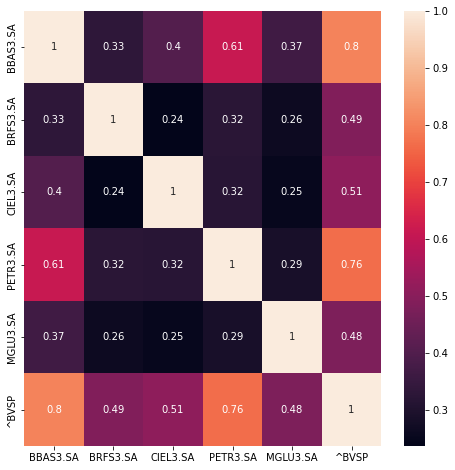

In [339]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True);

#### Montando uma Carteira de Ativos

In [340]:
taxas_retorno_date["CARTEIRA"] = (taxas_retorno_date["BBAS3.SA"] + taxas_retorno_date["BRFS3.SA"] + 
                                   taxas_retorno_date["CIEL3.SA"] + taxas_retorno_date["PETR3.SA"] + 
                                   taxas_retorno_date["MGLU3.SA"])/5
taxas_retorno_date

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,^BVSP,CARTEIRA
0,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,-0.020969,-0.019160,-0.034579,-0.084590,0.018618,-0.020724,-0.028136
2,2015-01-06,0.013880,0.008976,-0.020272,-0.025721,-0.013263,0.010134,-0.007280
3,2015-01-07,0.043078,0.043710,0.009265,0.047253,0.032835,0.030003,0.035228
4,2015-01-08,0.003401,-0.018047,0.027292,0.065278,-0.007782,0.009657,0.014029
...,...,...,...,...,...,...,...,...
1880,2022-07-27,0.006491,0.004288,0.037919,0.006490,0.033902,0.016560,0.017818
1881,2022-07-28,0.018395,-0.000611,-0.004662,0.020949,0.007380,0.011361,0.008290
1882,2022-07-29,-0.006650,-0.024142,0.034446,0.062232,-0.052843,0.005521,0.002609
1883,2022-08-01,-0.008095,0.046520,-0.018224,-0.012524,0.052843,-0.009153,0.012104


In [341]:
taxas_retorno_port = taxas_retorno_date.filter(["Date", "CARTEIRA", "^BVSP"])
taxas_retorno_port

,Date,CARTEIRA,^BVSP
0,2015-01-02,NaN,NaN
1,2015-01-05,-0.028136,-0.020724
2,2015-01-06,-0.007280,0.010134
3,2015-01-07,0.035228,0.030003
4,2015-01-08,0.014029,0.009657
...,...,...,...
1880,2022-07-27,0.017818,0.016560
1881,2022-07-28,0.008290,0.011361
1882,2022-07-29,0.002609,0.005521
1883,2022-08-01,0.012104,-0.009153


In [342]:
figuraComparacao = px.line(title = 'Comparação de retorno Carteira x Ibovespa')
for i in taxas_retorno_port.columns[1:]:
  figuraComparacao.add_scatter(x = taxas_retorno_port["Date"] ,y = taxas_retorno_port[i], name = i)
figuraComparacao.add_hline(y = taxas_retorno_port['CARTEIRA'].mean(), line_color="green", line_dash="dot", )
figuraComparacao.show()

In [343]:
taxas_retorno_port_corr = taxas_retorno_date.filter(["CARTEIRA", "^BVSP"])
taxas_retorno_port_corr

,CARTEIRA,^BVSP
0,NaN,NaN
1,-0.028136,-0.020724
2,-0.007280,0.010134
3,0.035228,0.030003
4,0.014029,0.009657
...,...,...
1880,0.017818,0.016560
1881,0.008290,0.011361
1882,0.002609,0.005521
1883,0.012104,-0.009153


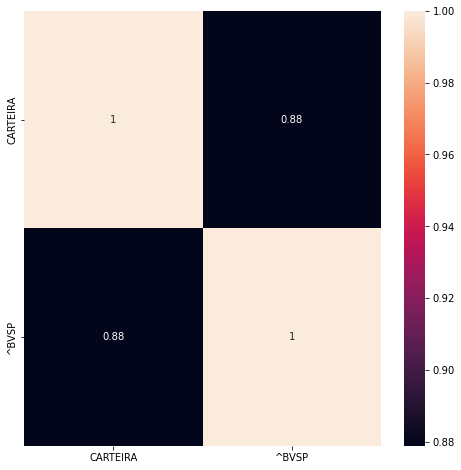

In [344]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno_port_corr.corr(), annot=True);

#### Alocação Aleatória de Ativos - Portfólio Markowitz

In [345]:
acoes_port = acoes_df.copy()
acoes_port.drop(labels = ['^BVSP'], axis=1, inplace=True)
acoes_port

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA
0,2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812
1,2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187
2,2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062
3,2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875
4,2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000
...,...,...,...,...,...,...
1880,2022-07-27,35.549999,16.360001,4.300000,34.009998,2.700000
1881,2022-07-28,36.209999,16.350000,4.280000,34.730000,2.720000
1882,2022-07-29,35.970001,15.960000,4.430000,36.959999,2.580000
1883,2022-08-01,35.680000,16.719999,4.350000,36.500000,2.720000


In [346]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1]) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [347]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(acoes_port, 10000, 10)

C:\Users\demet\AppData\Local\Temp\ipykernel_7568\2210113608.py:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [348]:
dataset

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA,soma valor,taxa retorno
0,2885.564869,77.634505,2370.522690,2801.328081,1864.949855,10000.000000,0.000000
1,2825.687892,76.161222,2289.953564,2574.109390,1899.995934,9665.908002,-3.398004
2,2865.181207,76.847920,2243.999263,2508.745056,1874.963020,9569.736468,-0.999939
3,2991.305208,80.281423,2264.887635,2630.135750,1937.549303,9904.159319,3.434913
4,3001.497039,78.845594,2327.552555,2807.553397,1922.529555,10137.978140,2.333378
...,...,...,...,...,...,...,...
1880,4528.999145,20.426191,443.452490,10585.907037,21628.458360,37207.243222,2.270619
1881,4613.081812,20.413705,441.389922,10810.013663,21788.669007,37673.568109,1.245528
1882,4582.506562,19.926772,456.859155,11504.120368,20667.192567,37230.605424,-1.182759
1883,4545.561022,20.875665,448.608885,11360.941662,21788.669007,38164.656240,2.477871


In [349]:
acoes_pesos

,Ações,Pesos
0,BBAS3.SA,0.288556
1,BRFS3.SA,0.007763
2,CIEL3.SA,0.237052
3,PETR3.SA,0.280133
4,MGLU3.SA,0.186495


In [350]:
datas

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
1880   2022-07-27
1881   2022-07-28
1882   2022-07-29
1883   2022-08-01
1884   2022-08-02
Name: Date, Length: 1885, dtype: datetime64[ns]

In [351]:
soma_valor

38158.89652294827

In [352]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio',
                labels=dict(x="Data", y="Retorno %"))
figura.add_hline(y = dataset['taxa retorno'].mean(), line_color="red", line_dash="dot", )
figura.show()

In [353]:
figura = px.line(title = 'Evolução do patrimônio')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [354]:
figura = px.line(x = datas, y = dataset['soma valor'], 
                 title = 'Evolução do patrimônio da Carteira',
                 labels=dict(x="Data", y="Valor R$"))
figura.add_hline(y = dataset['soma valor'].mean(), 
                 line_color="green", line_dash="dot", )
figura.show()

#### Mais estatísticas sobre o portfólio aleatório

In [355]:
# Retorno
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

2.815889652294827

In [356]:
# Desvio-Padrão
dataset['taxa retorno'].std()

2.9339930083988293

In [357]:
# Sharpe Ratio
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std())

0.024213999360974556

In [358]:
dinheiro_total = 10000
soma_valor - dinheiro_total

28158.89652294827

## Simulação da Fronteira Eficiente

In [359]:
acoes_port

,Date,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA
0,2015-01-02,22.650000,62.180000,22.986111,9.000000,0.232812
1,2015-01-05,22.180000,61.000000,22.204861,8.270000,0.237187
2,2015-01-06,22.490000,61.549999,21.759258,8.060000,0.234062
3,2015-01-07,23.480000,64.300003,21.961805,8.450000,0.241875
4,2015-01-08,23.559999,63.150002,22.569445,9.020000,0.240000
...,...,...,...,...,...,...
1880,2022-07-27,35.549999,16.360001,4.300000,34.009998,2.700000
1881,2022-07-28,36.209999,16.350000,4.280000,34.730000,2.720000
1882,2022-07-29,35.970001,15.960000,4.430000,36.959999,2.580000
1883,2022-08-01,35.680000,16.719999,4.350000,36.500000,2.720000


In [360]:
log_ret = acoes_port.copy()
log_ret.drop(labels = ["Date"], axis = 1, inplace = True)
log_ret = np.log(log_ret/log_ret.shift(1))
log_ret

,BBAS3.SA,BRFS3.SA,CIEL3.SA,PETR3.SA,MGLU3.SA
0,NaN,NaN,NaN,NaN,NaN
1,-0.020969,-0.019160,-0.034579,-0.084590,0.018618
2,0.013880,0.008976,-0.020272,-0.025721,-0.013263
3,0.043078,0.043710,0.009265,0.047253,0.032835
4,0.003401,-0.018047,0.027292,0.065278,-0.007782
...,...,...,...,...,...
1880,0.006491,0.004288,0.037919,0.006490,0.033902
1881,0.018395,-0.000611,-0.004662,0.020949,0.007380
1882,-0.006650,-0.024142,0.034446,0.062232,-0.052843
1883,-0.008095,0.046520,-0.018224,-0.012524,0.052843


In [361]:
np.random.seed(42)
num_ports = 1000
all_weights = np.zeros((num_ports, len(acoes_port.columns[1:])))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((log_ret.mean() * weights))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [362]:
print("Max Sharpe Ratio: {}". format(sharpe_arr.max()))
print("Local do Max Sharpe Ratio: {}". format(sharpe_arr.argmax()))

Max Sharpe Ratio: 0.02988879175504415
Local do Max Sharpe Ratio: 643


In [363]:
# Pesos do Portfólio do Max Sharpe Ratio
print(all_weights[643,:])

[0.06771511 0.09521168 0.00114756 0.41402801 0.42189764]


In [364]:
# salvando os dados do Max Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
print(max_sr_ret)
print(max_sr_vol)

0.00080627588242513
0.02697586068493584


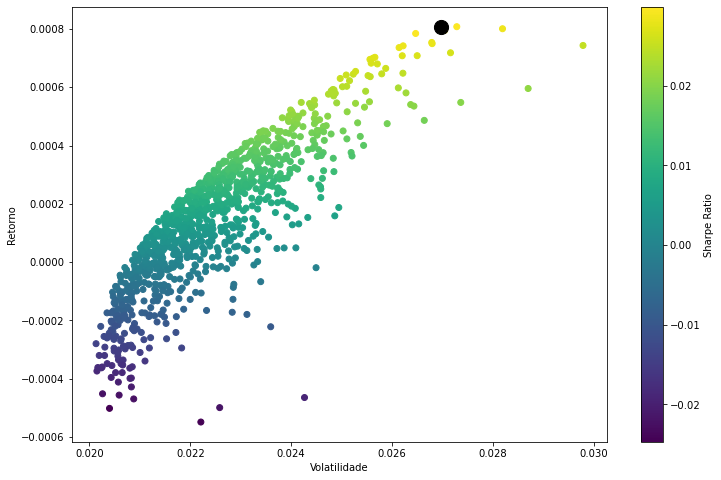

In [365]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200) # black dot
plt.show()

Nós podemos ver no gráfico assima o conjunto de portfólios simulados, pois o peso $w_i$ de cada ativo foi simulado e criamos um conjunto de $n = 1000$ carteiras e escolhemos no ponto vermelho a que tem maior **Sharpe Ratio**, que é a razão retorno sobre a volatilidade. Esse dado nos da uma noção do portfólio ponderado pelo risco.

In [366]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [367]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = ((0.2),(0.2),(0.2),(0.2),(0.2))

In [368]:
op_results = optimize.minimize(neg_sharpe, init_guess, method="SLSQP", bounds= bounds, constraints=cons)
print(op_results)

     fun: -0.03489399060129055
     jac: array([ 9.28937551e-03,  3.29492362e-02,  3.91169959e-02, -1.38068106e-04,
        9.15238634e-05])
 message: 'Optimization terminated successfully'
    nfev: 60
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.30828420e-16, 0.00000000e+00, 0.00000000e+00, 3.98636242e-01,
       6.01363758e-01])


In [369]:
frontier_y = np.linspace(-0.0006, 0.0008, 200)

In [370]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [371]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

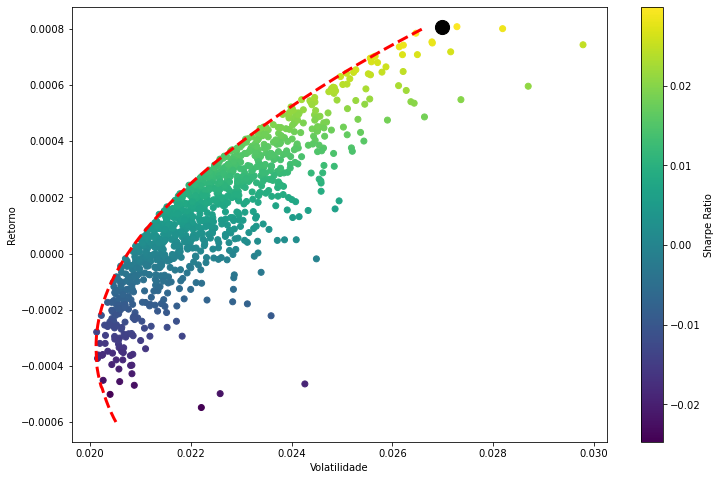

In [372]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=200)
# plt.savefig('cover.png')
plt.show()